In [1]:
from scipy import signal
import numpy as np
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.utils import shuffle


import sys
sys.path.append('../')
from Utils.constants import TRAIN_FILES, TEST_FILES
from Utils.perturbations import RBPIndividual, zeroPerturb, noisePerturb, blurPerturb
from Utils.data import *

In [2]:
X_train, y_train, X_test, y_test, nb_classes = loadUCRDataID(0)

Loading train / test dataset :  ../Data/Coffee_TRAIN ../Data/Coffee_TEST


In [3]:
#The first multisample background generation approac. 
#All spectral matrixs are superpositioned and treated as a single sample.

def multisamplebackgroundIdentification(global_signals):
    test_sig = global_signals[0].flatten()
    f, t, Zxx = signal.stft(test_sig,1,nperseg=40)
    count = 1
    for i in range(1,len(global_signals)):
        test_sig = global_signals[i].flatten()
        f0, t0, Zxx0 = signal.stft(test_sig,1,nperseg=40, noverlap = 20)
        assert Zxx.shape == Zxx0.shape, f"Shape mismatch at signal {i}"
        Zxx = Zxx + Zxx0
        count+=1
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud') 
    plt.title('STFT Magnitude Spectrum')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Magnitude')
    plt.ylim(np.min(f), np.max(f))
    plt.show()
    frequency_composition_abs = np.abs(Zxx)
    measures = []
    for freq,freq_composition in zip(f,frequency_composition_abs):
        measures.append(np.mean(freq_composition)/np.std(freq_composition))
    max_value = max(measures)
    selected_frequency = measures.index(max_value)
    print(selected_frequency)
    weights = 1-(measures/sum(measures))
    dummymatrix = np.zeros((len(f),len(t)))
    dummymatrix[selected_frequency,:] = 1  
    #Option to admit information from other frequency bands
    """dummymatrix = np.ones((len(f),len(t)))
    for i in range(0,len(weights)):
        dummymatrix[i,:] = dummymatrix[i,:] * weights[i]"""
    
    background_frequency = Zxx * dummymatrix / count
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(background_frequency), shading='gouraud') 
    plt.title('STFT Magnitude Spectrum')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Magnitude')
    plt.ylim(np.min(f), np.max(f))
    plt.show()
    _, xrec = signal.istft(background_frequency, 1)
    return xrec,f,t,Zxx



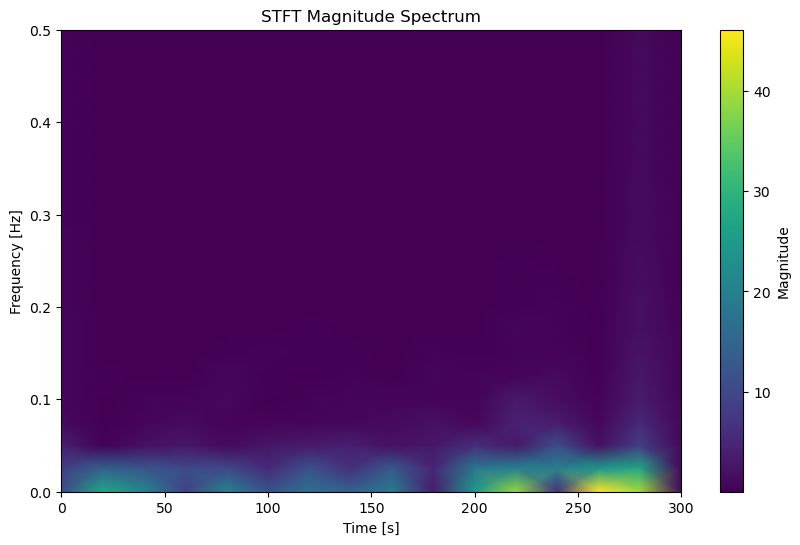

1


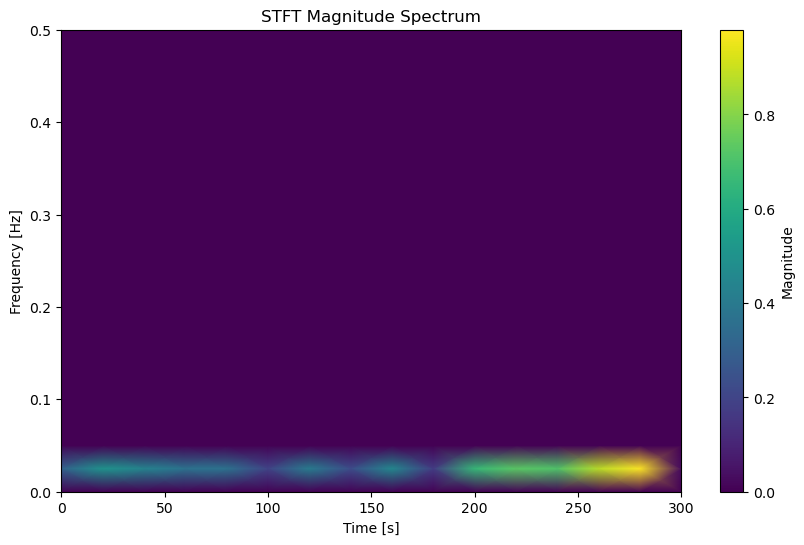

In [4]:
rec1,f,t,Zxx = multisamplebackgroundIdentification(X_train)

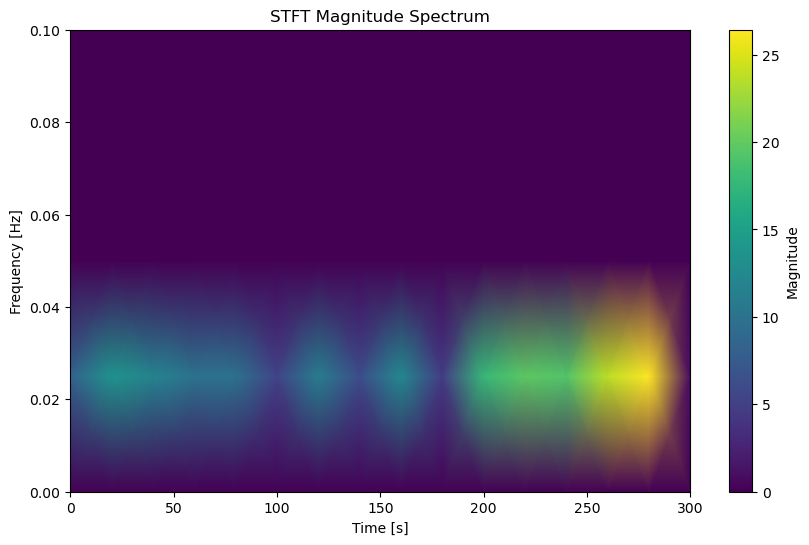

0.0
0.0
12.575945996420899
6.932145070168262
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
inf


/var/folders/wj/mhshdkv54913b6jxv0xzmg9r0000gn/T/ipykernel_45220/389941497.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  measures.append(np.mean(freq_composition)+0.0001/np.std(freq_composition)+0.0001)
/var/folders/wj/mhshdkv54913b6jxv0xzmg9r0000gn/T/ipykernel_45220/389941497.py:54: RuntimeWarning: invalid value encountered in divide
  weights = 1-(measures/sum(measures))


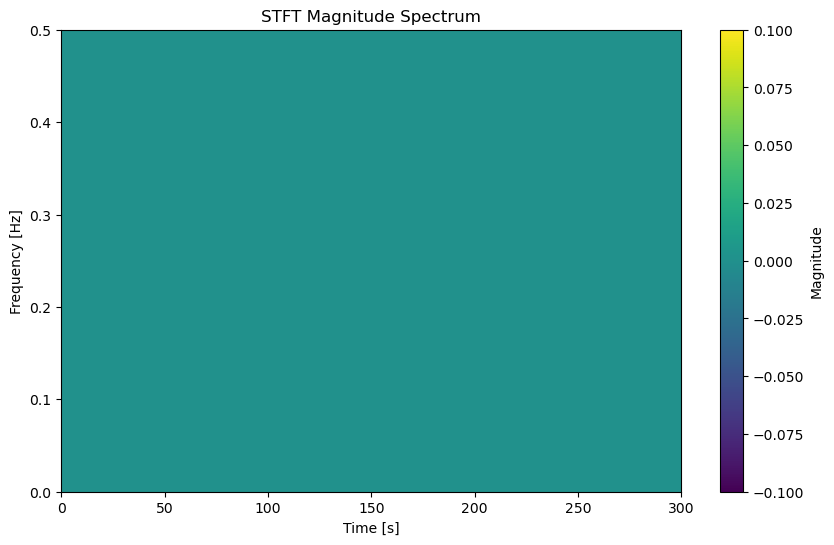

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
#The second background identification approach which combines the most significant frequency component 
#of every sample into a spectral matrix and identify the background in this matrix


#Identify backgrounds in a single TS
def backgroundfreqIdentification(original_signal):
    f, t, Zxx = signal.stft(original_signal,fs = 1,nperseg=40, noverlap = 20)
    frequency_composition_abs = np.abs(Zxx)
    measures = []
    for freq,freq_composition in zip(f,frequency_composition_abs):
        measures.append(np.mean(freq_composition)/np.std(freq_composition))
    max_value = max(measures)
    selected_frequency = measures.index(max_value)
    Zxx_candidate = np.zeros_like(Zxx, dtype=complex)
    # insert the selected component into selected frequency
    Zxx_candidate[selected_frequency, :] = Zxx[selected_frequency, :]
    return Zxx_candidate



#Background Identification
def candidatebackgroundIdentification(global_signals):
    #Set up template matrix
    test_sig = global_signals[0].flatten()
    f_, t_, Zxx_ = signal.stft(test_sig,1,nperseg=40)
    Zxx = np.zeros_like(Zxx_, dtype=complex)

    #For every sample, return a spectral matrix representing the background 
    for i in range(1,len(global_signals)):
        test_sig = global_signals[i].flatten()
        Zxx_candidate = backgroundfreqIdentification(test_sig)
        assert Zxx.shape == Zxx_candidate.shape, f"Shape mismatch at signal {i}"
        #Add all backgrounds together
        Zxx = Zxx + Zxx_candidate
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t_, f_, np.abs(Zxx), shading='gouraud') 
    plt.title('STFT Magnitude Spectrum')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Magnitude')
    
    plt.ylim(np.min(f_), 0.1)
    
    plt.show()
    frequency_composition_abs = np.abs(Zxx)
    measures = []
    for freq,freq_composition in zip(f_,frequency_composition_abs):
        measures.append(np.mean(freq_composition)+0.0001/np.std(freq_composition)+0.0001)
        print(np.mean(freq_composition))
        print(np.std(freq_composition))
    max_value = max(measures)
    print(max_value)
    selected_frequency = measures.index(max_value)
    weights = 1-(measures/sum(measures))
    dummymatrix = np.zeros((len(f_),len(t_)))
    dummymatrix[selected_frequency,:] = 1  
    
    background_frequency = Zxx * dummymatrix
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t_, f_, np.abs(background_frequency), shading='gouraud') 
    plt.title('STFT Magnitude Spectrum')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Magnitude')
    
    plt.ylim(np.min(f_), np.max(f_))
    
    plt.show()
    _, xrec = signal.istft(background_frequency, 1)
    return xrec,f_,t_,Zxx


rec,f,t,Zxx = candidatebackgroundIdentification(X_train)
print(rec)

286
(21, 16)


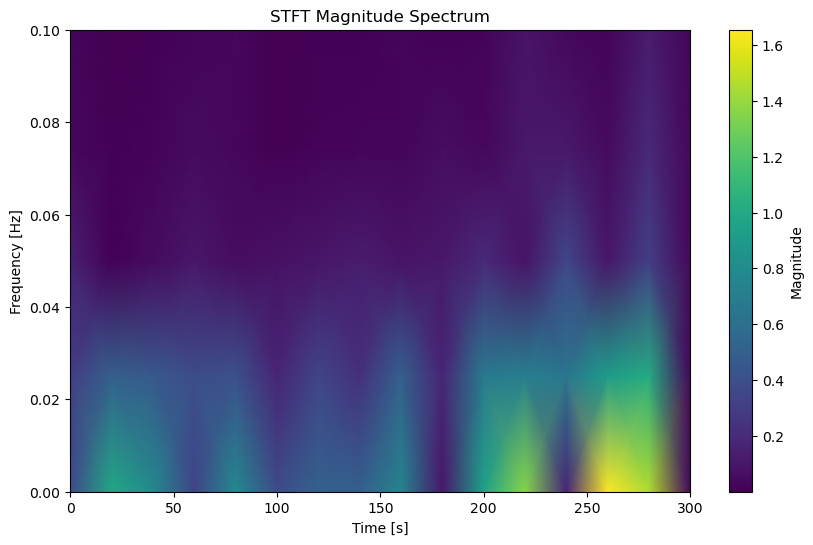

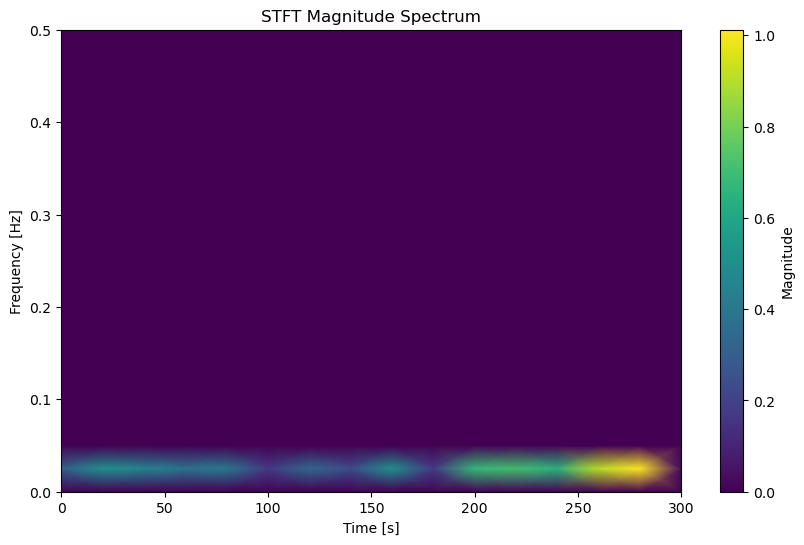

In [6]:
#The original approach

def backgroundIdentification(original_signal):
    f, t, Zxx = signal.stft(original_signal,fs = 1,nperseg=40, noverlap = 20)
    print(Zxx.shape)
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud') 
    plt.title('STFT Magnitude Spectrum')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Magnitude')
    plt.ylim(np.min(f), 0.1)
    plt.show()
    frequency_composition_abs = np.abs(Zxx)
    measures = []
    for freq,freq_composition in zip(f,frequency_composition_abs):
        measures.append(np.mean(freq_composition)/np.std(freq_composition))
    max_value = max(measures)
    selected_frequency = measures.index(max_value)
    weights = 1-(measures/sum(measures))
    dummymatrix = np.zeros((len(f),len(t)))
    dummymatrix[selected_frequency,:] = 1  
    
    background_frequency = Zxx * dummymatrix
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(background_frequency), shading='gouraud') 
    plt.title('STFT Magnitude Spectrum')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Magnitude')
    plt.ylim(np.min(f), np.max(f))
    plt.show()
    _, xrec = signal.istft(background_frequency, 1)
    return xrec

print(len(X_train[0]))
test_sig = X_train[0].flatten()
#print(test_sig)
#f, t, Zxx = signal.stft(test_sig,fs = 1,nperseg=40, noverlap = 20)
rec = backgroundIdentification(test_sig)



In [7]:
def perturb(perturbation_strategy, ts, index0, index1, global_ts = []):
    if perturbation_strategy == 'RBP':
        return RBPIndividual(ts, index0, index1)
    if perturbation_strategy == 'zero':
        return zeroPerturb(ts, index0, index1)
    if perturbation_strategy == 'noise':
        return noisePerturb(ts, index0, index1)
    if perturbation_strategy == 'blur':
        return blurPerturb(ts, index0, index1)
    if perturbation_strategy == 'RBP1':
        return RBPIndividualNew1(global_ts, ts, index0, index1)    
    if perturbation_strategy == 'RBP2':
        return RBPIndividualNew2(global_ts, ts, index0, index1)    

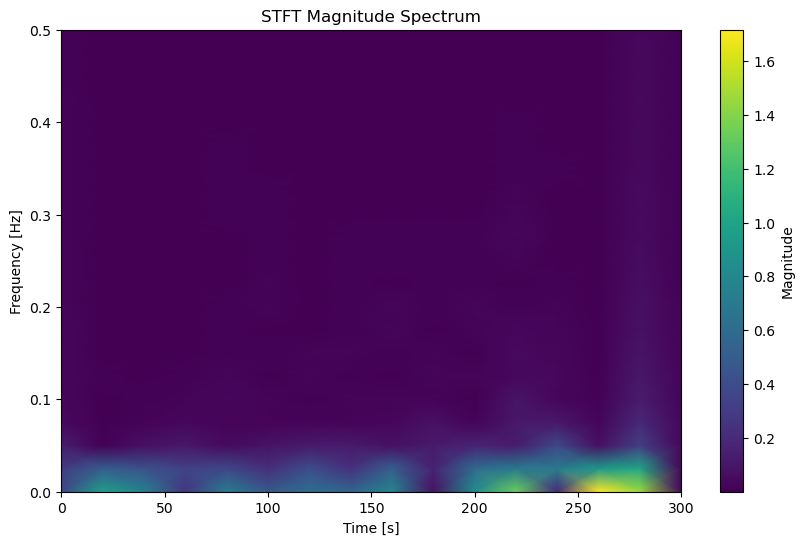

In [12]:
test_sig = X_train[1].flatten()
f, t, Zxx = signal.stft(test_sig,fs = 1,nperseg=40, noverlap = 20)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud') 
plt.title('STFT Magnitude Spectrum')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.ylim(np.min(f), np.max(f))
plt.show()

In [8]:
print((np.abs(rec1)-np.abs(rec))/rec)
#print(np.abs(rec1))

[-4.63198464e-02 -3.69874872e-02 -3.10517936e-02 -2.66527626e-02
 -2.29185381e-02 -1.93047618e-02 -1.53719103e-02 -1.07440926e-02
 -5.29210830e-03  3.55975306e-04  4.47992919e-03  5.50574597e-03
  3.83082755e-03  1.09816604e-03 -1.50332999e-03 -3.55798617e-03
 -5.04905766e-03 -6.07802186e-03 -6.75389433e-03 -7.16415492e-03
 -7.37306462e-03 -7.81794667e-03 -9.01218417e-03 -1.11946947e-02
 -1.47427793e-02 -2.02265264e-02 -2.84123274e-02 -3.99395946e-02
 -5.38144419e-02 -6.39534626e-02 -5.97930698e-02 -4.06271990e-02
 -1.84590059e-02 -1.03740003e-03  1.11829763e-02  1.98839195e-02
  2.65675494e-02  3.22608859e-02  3.76780265e-02  4.34034033e-02
  5.00568887e-02  5.78458877e-02  6.67111437e-02  7.70252708e-02
  8.91514317e-02  1.03339241e-01  1.19487407e-01  1.36749256e-01
  1.53171774e-01  1.65997290e-01  1.73288279e-01  1.76180980e-01
  1.80105164e-01  1.97031809e-01  2.70591838e-01 -8.66720946e-01
  1.28489789e-01  2.95308789e-02  6.62788618e-04 -1.25732122e-02
 -2.02879075e-02 -2.48961

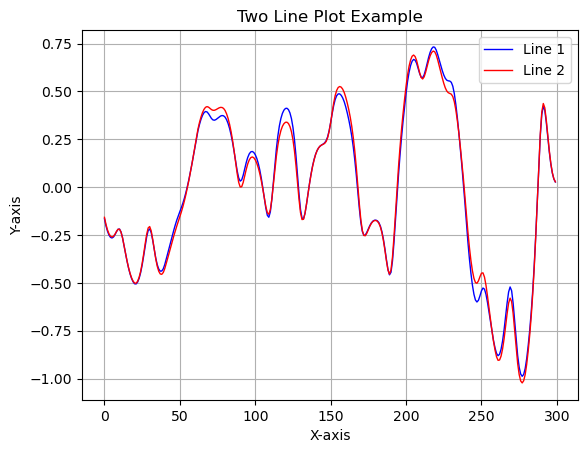

In [9]:
x = np.arange(len(rec1))
plt.plot(x, rec1, linewidth=1, label='Line 1', color='b')  # 第一条线
plt.plot(x, rec, linewidth=1, label='Line 2', color='r')  # 第二条线

# 添加图例、标题和标签
plt.legend()
plt.title('Two Line Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图表
plt.grid(True)  # 显示网格线
plt.show()